# Last Homework
### Steven Vaught
#### Problems 10.8, 10.9, 10.11, 10.12
---

# Problem 10.8
Calculate a value for the integral

$$
I = \int_0^1\frac{x^{-1/2}}{e^x + 1}dx,
$$

using the importance sampling formula, Eq. 10.42, with $w(x)=x^{-1/2}$, as follows.

#### Part A
show that the probability distribution $p(x)$ from which the sample points should be drawn is given by:

$$
p(x) = \frac{1}{2\sqrt{x}}
$$

and derive a transformation for generating random numbers between zero and one from this distribution

#### Part B
Using your forumula, sample N = 1,000,000 random points and hence evaluate the integral. You should get a value close to around 0.84.

#### Part A Derivation:
we know that the probability is given by:

$$
p(x) = \frac{w(x)}{\int_a^bw(x)dx}
$$

substituting what we are given, we get

$$
p(x) = \frac{x^{-1/2}}{\int_0^1x^{-1/2}dx}
$$

Carrying out the integration in the denominator:

$$
\int_0^1x^{-1/2}dx = {2x^{1/2}}\Biggr\rvert_1^0 = 2
$$

Then the expression becomes $p(x) = \frac{1}{2}x^{-1/2}$, or more simply:

$$
p(x) = \frac{1}{2\sqrt{x}}
$$

In [2]:
"""
Problem 10.8

Integration with Importance Sampling
"""
import numpy as np

N = 1000000
f = lambda x: 1/(np.exp(x) + 1)
I = sum(f(np.random.random(N)**2))/N*2
print(f"Integral is approx. ~{I:0.5f}")

Integral is approx. ~0.83899


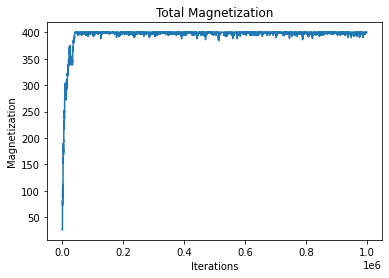


It seems like it either goes to 400 or -400 depending on the
initial conditions of the grid. I assume that an intial net positive spin yields 400
while an initial net negative magnetization yields -400. Either the spins all point
up by the end, or they all point down. QED.

Couldn't get animation to work, I included the code anyway.



In [ ]:
"""
Problem 10.9

The Ising Model
"""
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import matplotlib.animation as animation



""" Part A +++++++++++++++++++++++"""

def calc_energy(s):
    s1 = s[:-1,:]*s[1:,:]
    s2 = s[:,:-1]*s[:,1:]
    return -J*(np.sum(s1) + np.sum(s2))

""" Part B & C ++++++++++++++++++"""

# Constant Declaration
#rn.seed(1)
N = 20
J = 1
T = 1
kb = 1
beta = 1
steps = 1000000

# Initialization
s = rn.choice([1, -1], size = (N,N), p = (0.5, 0.5))
sum_list = []
E1 = calc_energy(s)
M = sum(s)

# Loop over number of iterations
for k in range(steps):
    
    # Random indices
    i, j = rn.randint(N), rn.randint(N)
    s[i,j] *= -1
    
    # get new energy & dE from spin flip
    E2 = calc_energy(s)
    dE = E2 - E1
    
    
    
    # if we gain energy from transition ...
    if dE > 0:
        # if probability is met, we use this transition
        if rn.random() < np.exp(-beta * dE):
            E1 = E2
            M = np.sum(s)
        # if probability is not met, we negate it
        else: 
            s[i,j] *= -1
    
    
    
    # if we gain negative energy from transition...
    else:
        # we use this transition
        E1 = E2
        M = np.sum(s)
        

    sum_list.append(M)
    
# Plotting the stuff
plt.plot(sum_list)
plt.title("Total Magnetization")
plt.xlabel("Iterations")
plt.ylabel("Magnetization")
plt.show()

""" Part D & E ++++++++++++++++++++++++++++"""


print(
"""
It seems like it either goes to 400 or -400 depending on the
initial conditions of the grid. I assume that an intial net positive spin yields 400
while an initial net negative magnetization yields -400. Either the spins all point
up by the end, or they all point down. QED.

Couldn't get animation to work, I included the code anyway.
""")



# Main function
def iterate(s):
    E1 = calc_energy(s)
    for k in range(steps):
        i, j = rn.randint(N), rn.randint(N)
        s[i,j] *= -1
        E2 = calc_energy(s)
        dE = E2 - E1
        if dE > 0:
            if rn.random() < np.exp(-beta * dE):
                E1 = E2
            else: 
                s[i,j] *= -1
        else:
            E1 = E2
        yield s

# Animation Initialization
fig = plt.figure()
ax = plt.axes()
frame = ax.imshow(s)

# Addding frames
frame_list = []
for p in iterate(s):
    frame = ax.plot(p, "b")
    frame_list.append(frame)

# Showing animation
anim = animation.ArtistAnimation(fig, frame_list, interval = 5, blit = True)
plt.show()


# Problem 10.11 - The Dimer Covering Problem
A well studied problem in condensed matter physics is the dimer covering problem in which dimers, meaning polymers with only two **MOLECULES**, land on the surface of a solid, falling in the spaces between the atoms on the surface and forming a grid like this:

$$
Pretend_there_is_a_picture_here
$$

blah blah blah rules and stuff

#### Part A
Write a program that solves the problem using simulated energy annealing on a 50X50 grid.

#### Part B
Try exponential cooling with different time constants


In [ ]:
"""
Problem 10.11

The Dimer Covering Problem
"""
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Initialization
N = 50
n_dimers = 0
Tmax = 1.0
Tmin = 1e-3
tau = 1e4
lattice = np.zeros((50, 50), int)

# Main Loop
def iterate(lattice):

    n_dimers = 0
    Tmax = 10.0
    Tmin = 1e-3
    tau = 1e4
    t = 0
    T = Tmax

    while T > Tmin:

        # First Coords. of potential Dimer
        x1, y1 = rn.randint(N, size = 2)

        # Second Coords. of potential Dimer
        ran = rn.random()
        x2, y2 = x1, y1
        if ran < 0.25:
            x2 += 1
        elif ran < 0.50:
            x2 -= 1
        elif ran < 0.75:
            y2 += 1
        elif ran < 1:
            y2 -= 1



        # if empty replace with Dimer
        try:
            if lattice[x1, y1] == 0 and lattice[x2, y2] == 0:
                lattice[x1, y1] = lattice[x2, y2] = 1
                n_dimers += 1

            # if Dimer, replace with empty (based on probability p)
            if lattice[x1, y1] == 1 and lattice[x2, y2] == 1:
                if rn.random() < np.exp(-t/tau):
                    lattice[x1, y1] = lattice[x2, y2] = 0
                    n_dimers -= 1

        except IndexError:
            continue

        # Cooling
        t += 1
        T = Tmax*np.exp(-t/tau)
        
        # yield grid for animation
        yield lattice
    

# Animation Initialization
fig = plt.figure()
ax = plt.axes()

# Addding frames
frame_list = []
i = 0
for cells in iterate(lattice):
    if i%100 ==0:
        frame = ax.imshow(cells, cmap = "seismic", animated = True)
        frame_list.append([frame])

# Showing animation
anim = animation.ArtistAnimation(
    fig, 
    frame_list, 
    interval = 5, 
    blit = True,
    repeat_delay = 1000
)
plt.show()


coverage = 100*n_dimers/(N*N)
print("Starting...")
print(f'Coverage Percentage is ~{coverage}')
print(f'Number of Dimers is {n_dimers}')
print('Couldn"t get animation to work')